In [2]:
# kNN (k-Nearest Neighbor) Algorithm
# 벡터 공간 내에서, 최단 거리의 이웃 데이터 개수에 따라 임의의 데이터를 이진 및 다중 분류하는 알고리즘
# ex) 서울 어느 한 지점에 서서 현 위치가 강남인지 강북인지 분류(예측)하기 위해서
# 주변 행인 5명한테 물어보니, 4명이 강남 1명이 강북이라 대답하여 강남으로 예측하는 기법

# kNN의 k는 예측을 위해 주변 몇 개의 이웃 데이터를 참고할지를 결정
# 따라서 가장 정확도가 높은 k 값을 선정하는 것이 과제

# NBA 농구 선수들의 게임 데이터를 활용한 포지션 예측

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("basketball_stat.csv")
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [3]:
# 포지션 확인 ( SG : 슈팅 가드, C : 센터 )
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'STL and 2P in 2D Plane')

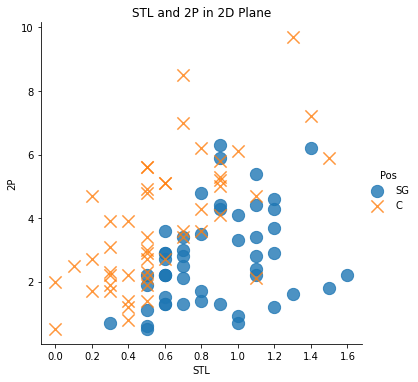

In [4]:
# 속성 선택 (가시화하여 필요/불필요 판단해보기)
# 스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 X
           scatter_kws={"s": 150},  # 좌표 상 점의 크기
           markers=["o", "x"],
           hue="Pos")  # 예측 값
plt.title('STL and 2P in 2D Plane')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'AST and 2P in 2D Plane')

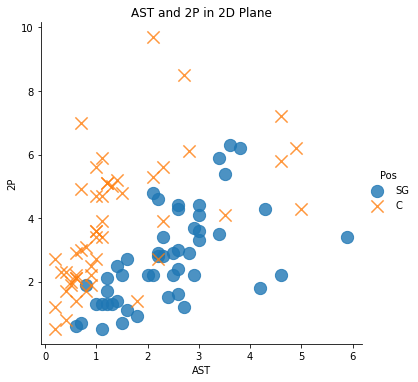

In [5]:
# 어시스트, 2점슛 데이터 시각화
sns.lmplot('AST', '2P', data=df, fit_reg=False,  # x 축, y 축, 데이터, 라인 X
           scatter_kws={"s": 150},  # 좌표 상 점의 크기
           markers=["o", "x"],
           hue="Pos")  # 예측 값
plt.title('AST and 2P in 2D Plane')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'BLK and 3P in 2D Plane')

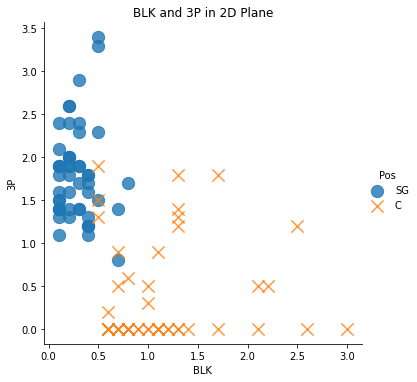

In [6]:
# 2점슛, 어시스트, 스틸과 같은 속성으로 분포시키면 분류를 하기에 모호한 것을 알 수 있음
# 따라서 다른 속성을 선택해야 함

# 블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK','3P', data=df, fit_reg=False,
           scatter_kws={"s": 150},
           markers=["o", "x"],
           hue="Pos")
plt.title('BLK and 3P in 2D Plane')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TRB and 3P in 2D Plane')

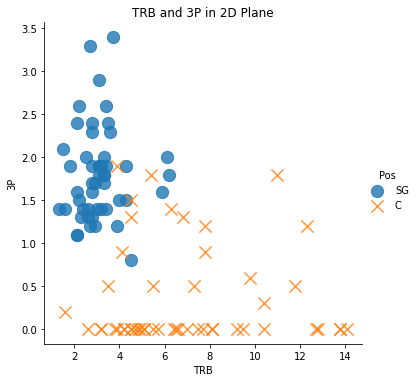

In [7]:
# 리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB','3P', data=df, fit_reg=False,
           scatter_kws={"s": 150},
           markers=["o", "x"],
           hue="Pos")
plt.title('TRB and 3P in 2D Plane')

In [8]:
# 분별력 없는 특싱을 데이터에서 제거

df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [11]:
# 학습 데이터, 테스트 데이터 나누기
# ScikitLearn 의 train_test_split 을 사용하면 간편하게 나눌 수 있음

from sklearn.model_selection import train_test_split

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류
train, test = train_test_split(df, test_size=0.2)

print(train.shape[0])  # 학습 데이터 80개
print(test.shape[0])  # 테스트 데이터 20개

80
20


In [16]:
# kNN 라이브러리 추가
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# 최적의 K 를 찾기 위해 교차 검증을 수행할 K 의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_score = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

# 교차 검증(10-fold)을 각 K 를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,
                             scoring='accuracy')
    cross_validation_score.append(scores.mean())

cross_validation_score


[0.9125,
 0.875,
 0.9125,
 0.9375,
 0.925,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.85,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8]